In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

rEarth = 6.378e6 #m
dEM = 3.8e8 #m
mEarth = 5.9e24 #kg
G = scipy.constants.G  #m^3 kg^-1 s^-2

In [37]:
def potential(M, xm, ym, x, y,R):
    r = np.sqrt((x-xm)**2 + (y-ym)**2)
    return np.where(r<R, np.nan, -G*M/r)

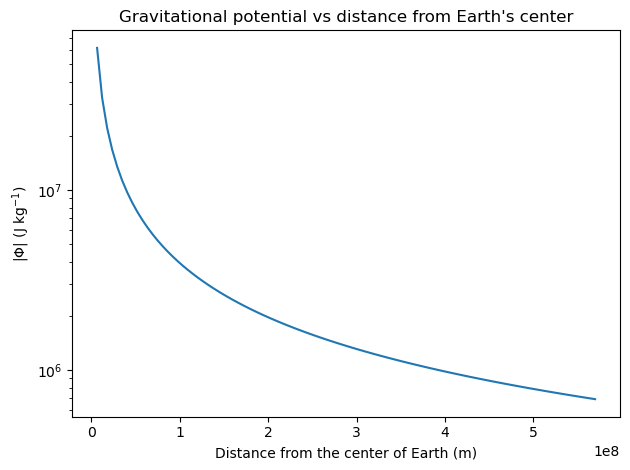

In [57]:
samples = 100
xs =np.linspace(rEarth, 1.5*dEM, samples)
ys = np.linspace(0,0,samples)
pots = potential(mEarth, 0,0,xs,ys,rEarth)
fig, ax = plt.subplots(1,1)
plt.plot(xs, np.abs(pots))
ax.set_xlabel("Distance from the center of Earth (m)")
ax.set_ylabel("|$\\Phi$| (J kg$^{-1}$)")
ax.set_yscale("log")
ax.set_title("Gravitational potential vs distance from Earth's center")
fig.tight_layout()

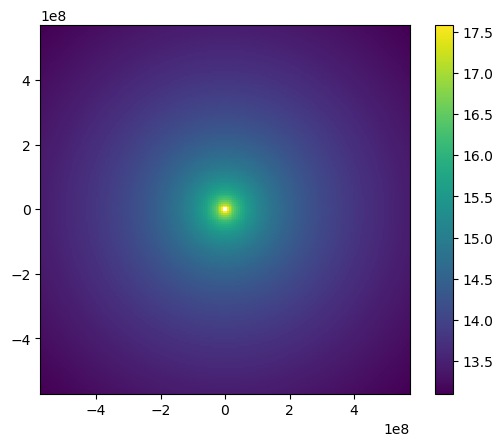

In [64]:
resolution = 200
xs, ys = np.meshgrid(np.linspace(-1.5*dEM, 1.5*dEM, resolution),np.linspace(-1.5*dEM, 1.5*dEM, resolution))
pot = potential(mEarth, 0,0,xs, ys,rEarth)

fig, ax = plt.subplots(1,1)
img = ax.pcolormesh(xs, ys, np.log(np.abs(pot)))
fig.colorbar(img)
ax.set_aspect(1)
